In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
tsp_data = pd.read_excel('数据科学实践Data/GA-TSP.xlsx' ,header=1, index_col=0)

# 定义TSP优化模型
定义TSP问题的距离矩阵和目标函数。

In [3]:
# 定义TSP优化模型

# 定义城市之间的距离矩阵
distance_matrix = tsp_data.values

# 定义目标函数，计算路径的总距离
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]
    total_distance += distance_matrix[route[-1], route[0]]  # 返回起点的距离
    return total_distance

# 示例路径
route = list(range(13))

# 计算示例路径的总距离
total_distance = calculate_total_distance(route, distance_matrix)
print(f"路径 {route} 的总距离为: {total_distance}")

路径 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 的总距离为: 38.8


# 设计GA算法步骤
设计GA算法的步骤，包括选择、交叉和变异操作。

In [4]:
def selection(population, fitness_values):
    selected_indices = np.random.choice(len(population), size=len(population), replace=True, p=fitness_values/fitness_values.sum())
    return [population[i] for i in selected_indices]

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]
    pointer = 0
    for gene in parent2:
        if gene not in child:
            while child[pointer] is not None:
                pointer += 1
            child[pointer] = gene
    return child

# 变异操作
def mutate(route, mutation_rate):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

# 示例种群
population = [list(range(13)) for _ in range(10)]

# 计算适应度值
fitness_values = np.array([1 / calculate_total_distance(ind, distance_matrix) for ind in population])

# 选择操作示例
selected_population = selection(population, fitness_values)
print(f"选择后的种群: {selected_population}")

# 交叉操作示例
child = crossover(population[0], population[1])
print(f"交叉后的子代: {child}")

# 变异操作示例
mutated_route = mutate(route, 0.1)
print(f"变异后的路径: {mutated_route}")

选择后的种群: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
交叉后的子代: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
变异后的路径: [5, 1, 2, 3, 4, 0, 10, 7, 8, 9, 6, 11, 12]


# P11-1 设置起点和终点，求TSP的最短路径
设定算法的max_epoch值和其它超参数值，随机生成初始群体，运行算法一次，绘制目标函数f(x)值随epoch变化的曲线图，输出f(x)的最小值f^opt及对应的变量x的最优值x^opt。

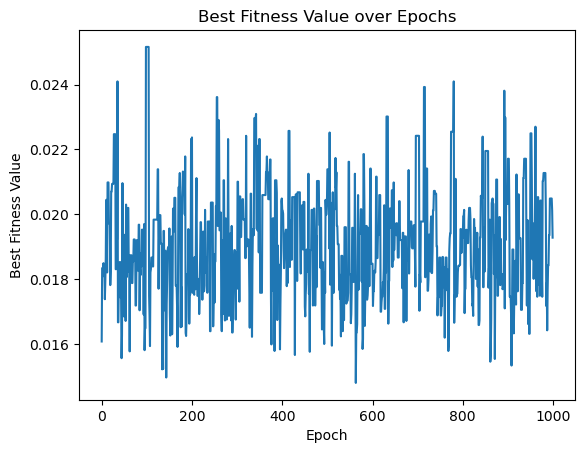

最小值 f^opt: 59.05
最优路径 x^opt: [5, 11, 12, 10, 7, 1, 9, 2, 0, 3, 8, 6, 4]


In [5]:
# 设置超参数
max_epoch = 1000
pop_size = 30
Pcross = 0.6
Pmutate = 0.2

# 初始化种群
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

def genetic_algorithm(distance_matrix, pop_size, max_epoch, Pcross, Pmutate):
    num_cities = len(distance_matrix)
    population = initialize_population(pop_size, num_cities)
    best_fitness_history = []
    
    for epoch in range(max_epoch):
        # 计算适应度值
        fitness_values = np.array([1 / calculate_total_distance(ind, distance_matrix) for ind in population])
        
        # 记录当前最优适应度值
        best_fitness_history.append(fitness_values.max())
        
        # 精英保留策略
        elite_index = fitness_values.argmax()
        elite_individual = population[elite_index]
        
        # 选择操作
        selected_population = selection(population, fitness_values)
        
        # 交叉操作
        next_population = []
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i + 1]
            if random.random() < Pcross:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
            else:
                child1, child2 = parent1, parent2
            next_population.extend([child1, child2])
        
        # 变异操作
        population = [mutate(route, Pmutate) for route in next_population]
        
        # 保留精英个体
        population[0] = elite_individual
    
    # 计算最终种群的适应度值
    fitness_values = np.array([1 / calculate_total_distance(ind, distance_matrix) for ind in population])
    best_fitness = fitness_values.max()
    best_route = population[fitness_values.argmax()]
    
    return best_fitness_history, best_fitness, best_route

# 运行算法一次
best_fitness_history, best_fitness, best_route = genetic_algorithm(distance_matrix, pop_size, max_epoch, Pcross, Pmutate)

# 绘制目标函数f(x)值随epoch变化的曲线图
plt.plot(range(max_epoch), best_fitness_history)
plt.xlabel('Epoch')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value over Epochs')
plt.show()

# 输出f(x)的最小值f^opt及对应的变量x的最优值x^opt
print(f"最小值 f^opt: {1 / best_fitness}")
print(f"最优路径 x^opt: {best_route}")

# P11-2 优化超参数值
固定max_epoch值，运行算法多次，每次随机生成初始群体，根据网格法设定超参数的一个值，绘制算法所求得的函数f(x)最小值随超参数值变化的曲线图，确定超参数的最优值。

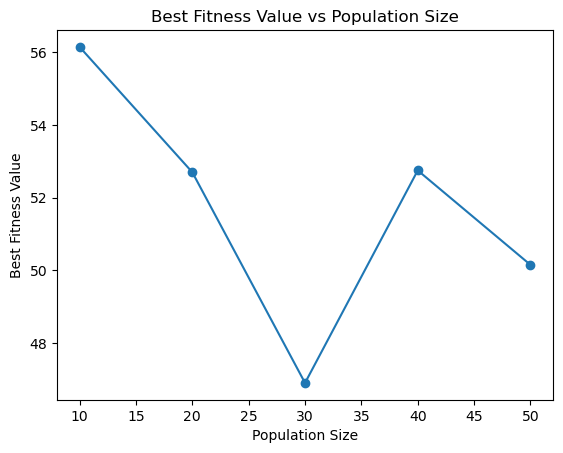

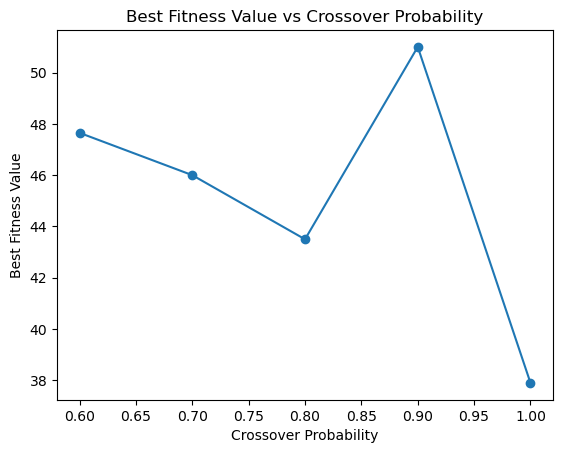

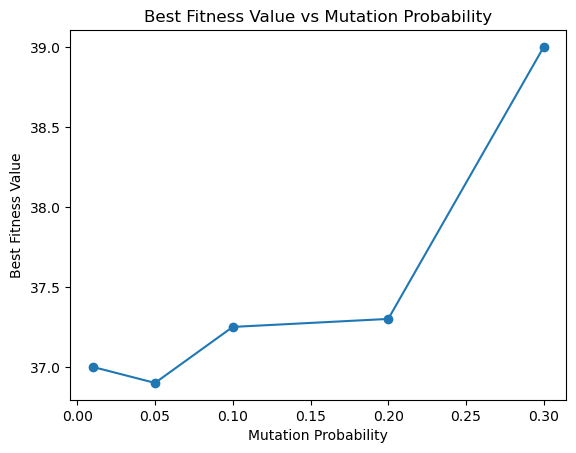

最优群体规模: 30
最优交叉概率: 1.0
最优变异概率: 0.05


In [6]:
# P11-2 优化超参数值

# 固定max_epoch值
max_epoch = 1000

# 超参数范围
pop_size_values = [10, 20, 30, 40, 50]
Pcross_values = [0.6, 0.7, 0.8, 0.9, 1.0]
Pmutate_values = [0.01, 0.05, 0.1, 0.2, 0.3]

# 优化群体规模POP
best_fitness_values_pop_size = []
for pop_size in pop_size_values:
    best_fitness_history, best_fitness, best_route = genetic_algorithm(distance_matrix, pop_size, max_epoch, Pcross, Pmutate)
    best_fitness_values_pop_size.append(1 / best_fitness)

plt.plot(pop_size_values, best_fitness_values_pop_size, marker='o')
plt.xlabel('Population Size')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value vs Population Size')
plt.show()

# 优化交叉概率Pcross
best_fitness_values_Pcross = []
for Pcross in Pcross_values:
    best_fitness_history, best_fitness, best_route = genetic_algorithm(distance_matrix, pop_size, max_epoch, Pcross, Pmutate)
    best_fitness_values_Pcross.append(1 / best_fitness)

plt.plot(Pcross_values, best_fitness_values_Pcross, marker='o')
plt.xlabel('Crossover Probability')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value vs Crossover Probability')
plt.show()

# 优化变异概率Pmutate
best_fitness_values_Pmutate = []
for Pmutate in Pmutate_values:
    best_fitness_history, best_fitness, best_route = genetic_algorithm(distance_matrix, pop_size, max_epoch, Pcross, Pmutate)
    best_fitness_values_Pmutate.append(1 / best_fitness)

plt.plot(Pmutate_values, best_fitness_values_Pmutate, marker='o')
plt.xlabel('Mutation Probability')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value vs Mutation Probability')
plt.show()

# 确定最优超参数值
optimal_pop_size = pop_size_values[np.argmin(best_fitness_values_pop_size)]
optimal_Pcross = Pcross_values[np.argmin(best_fitness_values_Pcross)]
optimal_Pmutate = Pmutate_values[np.argmin(best_fitness_values_Pmutate)]

print(f"最优群体规模: {optimal_pop_size}")
print(f"最优交叉概率: {optimal_Pcross}")
print(f"最优变异概率: {optimal_Pmutate}")

# P11-3 求TSP的全局最小值
固定max_epoch值，设定所有超参数为其最优值，运行算法多次，每次随机生成初始群体，绘制每次运行对应的目标函数f(x)最小值的散点图，输出f(x)的全局最小值f^*及对应的变量x的最优值x^*。

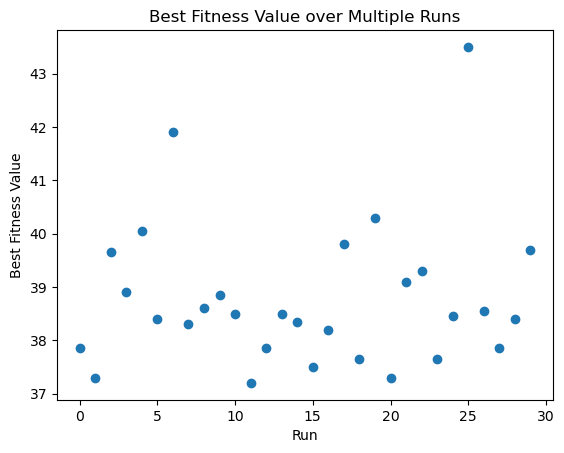

全局最小值 f^*: 37.199999999999996
最优路径 x^*: [0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 11, 5, 2]


In [8]:
# P11-3 求TSP的全局最小值

# 固定max_epoch值
max_epoch = 100

# 设定所有超参数为其最优值
optimal_pop_size = 30
optimal_Pcross = 1
optimal_Pmutate = 0.05

# 运行算法多次，每次随机生成初始群体
num_runs = 30
best_fitness_values = []
best_routes = []

for _ in range(num_runs):
    best_fitness_history, best_fitness, best_route = genetic_algorithm(distance_matrix, optimal_pop_size, max_epoch, optimal_Pcross, optimal_Pmutate)
    best_fitness_values.append(1 / best_fitness)
    best_routes.append(best_route)

# 绘制每次运行对应的目标函数f(x)最小值的散点图
plt.scatter(range(num_runs), best_fitness_values)
plt.xlabel('Run')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value over Multiple Runs')
plt.show()

# 输出f(x)的全局最小值f^*及对应的变量x的最优值x^*
global_best_fitness = min(best_fitness_values)
global_best_route = best_routes[best_fitness_values.index(global_best_fitness)]

print(f"全局最小值 f^*: {global_best_fitness}")
print(f"最优路径 x^*: {global_best_route}")

# O11-4

In [8]:
import itertools
import concurrent.futures


def tsp(start_city):
    cities = list(range(len(distance_matrix)))
    cities.remove(start_city)
    min_distance = float('inf')
    best_path = None
    for perm in itertools.permutations(cities):
        path = [start_city] + list(perm)
        distance = calculate_total_distance(path, distance_matrix)
        if distance < min_distance:
            min_distance = distance
            best_path = path
    return best_path, min_distance

def compute_min_distance():
    num_cities = len(distance_matrix)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(tsp, start_city) for start_city in range(num_cities)]
        results = [future.result() for future in concurrent.futures.as_completed(futures)]
    
    best_overall_path, best_overall_distance = min(results, key=lambda x: x[1])
    print(f"最佳路径: {best_overall_path}, 最短距离: {best_overall_distance}")

In [9]:
compute_min_distance()

最佳路径: [4, 3, 10, 12, 11, 9, 8, 7, 6, 5, 2, 0, 1], 最短距离: 36.9
